### Name: Dat Ho

# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

pd.options.display.float_format = "{:.4f}".format

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# Library to split data
from sklearn.model_selection import train_test_split

# To tune different models
from sklearn.model_selection import GridSearchCV

# Library to build decision tree
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

# Library for XG Boosting
from xgboost import XGBClassifier

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

**Load the data**

In [2]:
visa_data = pd.read_csv("EasyVisa.csv")
df = visa_data.copy()

<IPython.core.display.Javascript object>

**Display the first and last 5 rows of the dataset**

In [3]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

In [4]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.9100,Year,Y,Certified


<IPython.core.display.Javascript object>

In [5]:
df.shape

(25480, 12)

<IPython.core.display.Javascript object>

* The dataset contains 12 columns and 25480 rows

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

* There are nine variables 'object' datatype, two variables 'int64' datatype, one variable 'float64' datatype.

In [7]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

* There is no mising data 

In [8]:
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

* No duplication

### Explore numerical data columns

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0000,5667.0432,22877.9288,-26.0000,1022.0000,2109.0000,3504.0000,602069.0000
yr_of_estab,25480.0000,1979.4099,42.3669,1800.0000,1976.0000,1997.0000,2005.0000,2016.0000
prevailing_wage,25480.0000,74455.8146,52815.9423,2.1367,34015.4800,70308.2100,107735.5125,319210.2700


<IPython.core.display.Javascript object>

* The minimum number of employees is -26. This could be an issue since it must be a positive number. Require imputation.
* All of the companies established range from 1800 to 2016.
* The average prevailing wage is 74455 dollars. This minimum prevailing wage is 2 dollars which is extremely low, indicating there is outliers in the dataset. The maximum prevailing wage is 319210 dollars. 

**Sorted the dataset by `no_of_employees` in an ascending order**

In [10]:
df.sort_values(by="no_of_employees", ascending=True).head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14146,EZYV14147,Asia,Bachelor's,N,Y,-26,1954,West,81982.2700,Year,Y,Certified
9872,EZYV9873,Europe,Master's,Y,N,-26,1996,South,37397.0500,Year,Y,Certified
16883,EZYV16884,North America,Bachelor's,Y,N,-26,1968,Northeast,168.1558,Hour,Y,Denied
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied


<IPython.core.display.Javascript object>

In [11]:
df.loc[df["no_of_employees"] < 0].value_counts().sum()

33

<IPython.core.display.Javascript object>

* There are 33 negative values in the `no_of_employees` column.

In [12]:
df.no_of_employees = np.abs(df.no_of_employees)

<IPython.core.display.Javascript object>

In [13]:
df.loc[df["no_of_employees"] < 0].value_counts().sum()

0

<IPython.core.display.Javascript object>

* All negatives have been treated.

### Explore categorical data columns

In [14]:
categorical_data = list(df.select_dtypes("object").columns)

for col in categorical_data:
    print(df[col].value_counts())
    print("." * 50)

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
..................................................
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
..................................................
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
..................................................
Y    14802
N    10678
Name: has_job_experience, dtype: int64
..................................................
N    22525
Y     2955
Name: requires_job_training, dtype: int64
..................................................
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

<IPython.core.display.Javascript object>

In [15]:
df.case_id.nunique()

25480

<IPython.core.display.Javascript object>

* `case_id` column has 25480 unique values and does not contribute to the analysis. We can drop the column.

In [16]:
df.drop(["case_id"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [17]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

* The `case_id` has been dropped.

## Exploratory Data Analysis (EDA)


### **Note**: The detailed EDA can be found in the <a href = #link1>appendix section</a>.

In [18]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [19]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [20]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [21]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

**1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?**

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


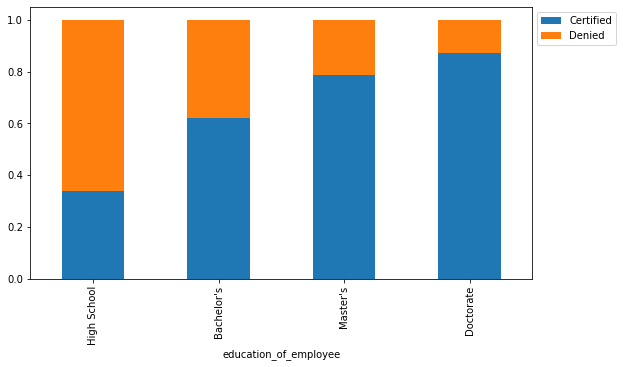

<IPython.core.display.Javascript object>

In [22]:
stacked_barplot(df, "education_of_employee", "case_status")

##### Observations:
* Higher education degree holders tend to be certified for work visa

**2. How does the visa status vary across different continents?**

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


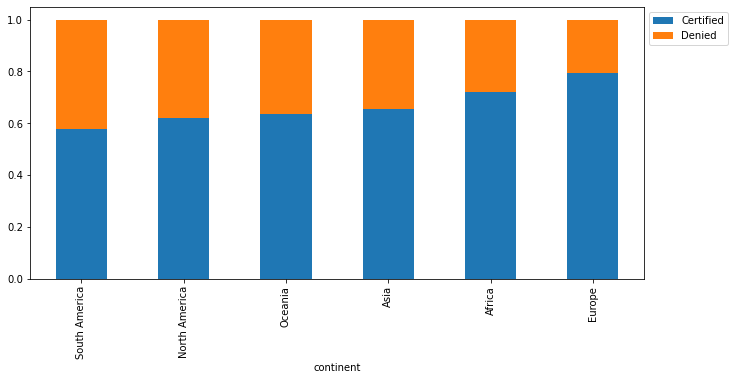

<IPython.core.display.Javascript object>

In [23]:
stacked_barplot(df, "continent", "case_status")

##### Observations:
* The distribution of certified visa is normal across continents. The visa certification rate seems highest in Europe (> ~70%)

**3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?** 

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


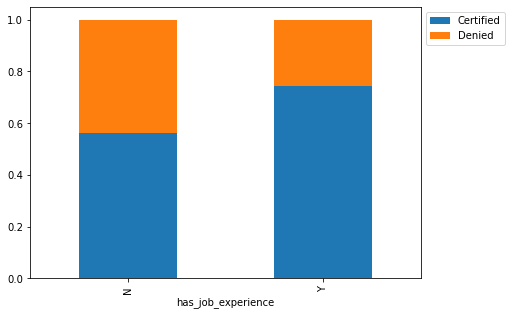

<IPython.core.display.Javascript object>

In [24]:
stacked_barplot(df, "has_job_experience", "case_status")

##### Observations:
* Employees with work experience are more likely to be certified for a work visa.


**4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?** 

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


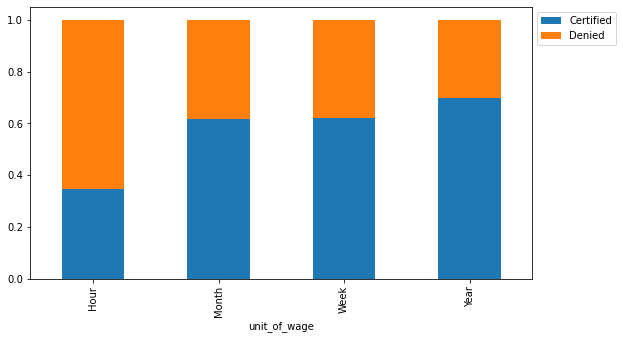

<IPython.core.display.Javascript object>

In [25]:
stacked_barplot(df, "unit_of_wage", "case_status")

##### Observations:
* Yearly wage unit is most likely to be certified for a visa.

**5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?**

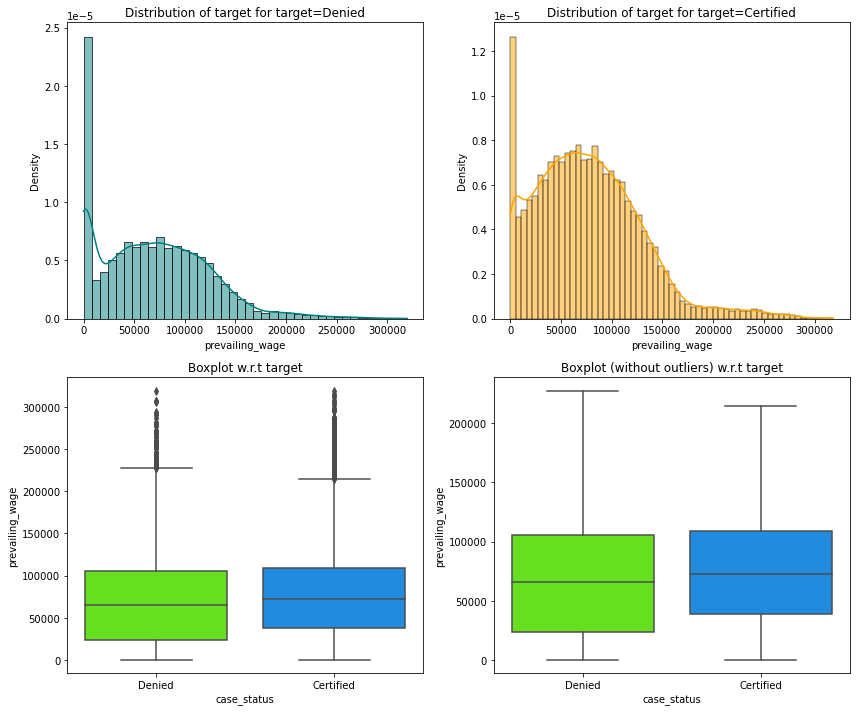

<IPython.core.display.Javascript object>

In [26]:
distribution_plot_wrt_target(df, "prevailing_wage", "case_status")

##### Observations:
* The certified visa seems to have a higher prevailing wage. 

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [27]:
data = df.copy()

<IPython.core.display.Javascript object>

In [28]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

### Outliers

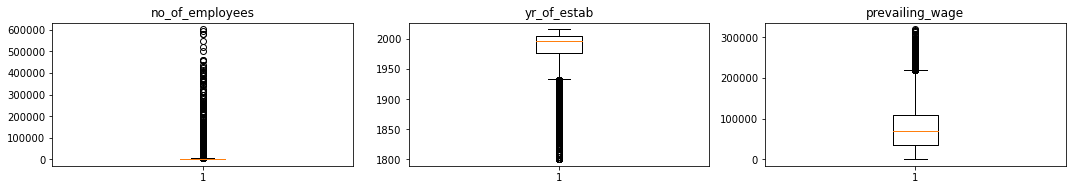

<IPython.core.display.Javascript object>

In [29]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

* There are outliers in the dataset but we will not treat them as they are part of the data.

### Data Preparation

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

`case_status`

- 1: Certified
- 0: Denied

In [30]:
# encode categorical features for case_status
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

<IPython.core.display.Javascript object>

In [31]:
X = data.drop(["case_status"], axis=1)  
y = data["case_status"]

#get dummies
X = pd.get_dummies(X, drop_first=True)

#splitting the data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)


<IPython.core.display.Javascript object>

In [32]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1   0.6679
0   0.3321
Name: case_status, dtype: float64
Percentage of classes in test set:
1   0.6678
0   0.3322
Name: case_status, dtype: float64


<IPython.core.display.Javascript object>

## EDA

- It is a good idea to explore the data once again after manipulating it.

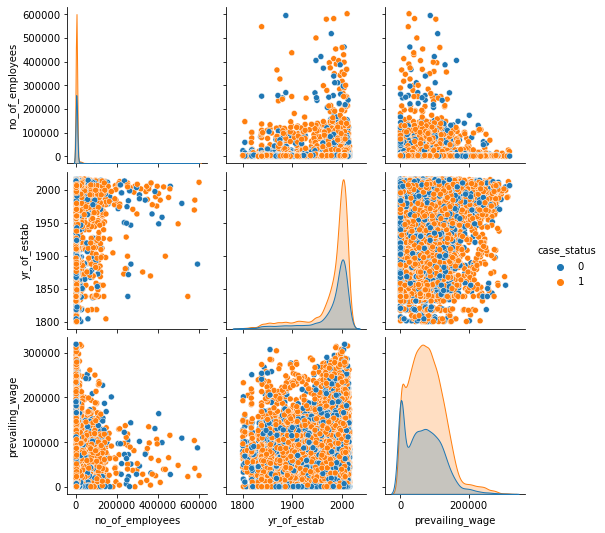

<IPython.core.display.Javascript object>

In [33]:
sns.pairplot(data, hue="case_status")

## Building bagging and boosting models

### Model Evaluation Criterion
#### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified. 

#### Which case is more important? 
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy. 



#### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 
* We will use balanced class weights so that model focuses equally on both classes.

In [34]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [35]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Bagging Model

#### Decision Tree

In [36]:
# Building a decision tree on the train data
dTree = DecisionTreeClassifier(random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

**Checking the performance on the train set**

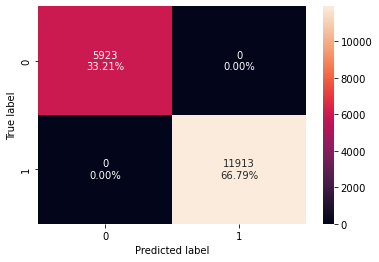

<IPython.core.display.Javascript object>

In [37]:
# create a confusion matrix
confusion_matrix_sklearn(dTree, X_train, y_train)

In [38]:
dTree_train_perf = model_performance_classification_sklearn(dTree, X_train, y_train)
dTree_train_perf

,Accuracy,Recall,Precision,F1
0,1.0000,1.0000,1.0000,1.0000


<IPython.core.display.Javascript object>

**Checking the performance on the test set**

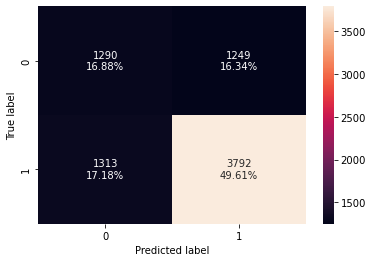

<IPython.core.display.Javascript object>

In [39]:
confusion_matrix_sklearn(dTree, X_test, y_test)

In [40]:
dTree_test_perf = model_performance_classification_sklearn(dTree, X_test, y_test)
dTree_test_perf

,Accuracy,Recall,Precision,F1
0,0.6648,0.7428,0.7522,0.7475


<IPython.core.display.Javascript object>

**Observation:**
* The `Decision tree` model is overfitting. It performs well on the train data but not on the test data.

#### Bagging Classifier

In [41]:
# Using Bagging Classifier on the train data
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

**Checking the performance on the train set**

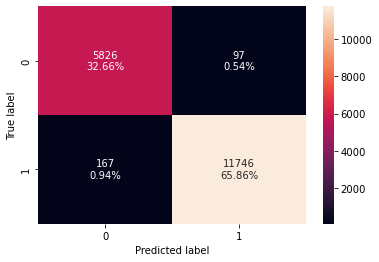

<IPython.core.display.Javascript object>

In [42]:
# Create a confusion matrix
confusion_matrix_sklearn(bagging, X_train, y_train)

In [43]:
bagging_train_perf = model_performance_classification_sklearn(bagging, X_train, y_train)
bagging_train_perf

,Accuracy,Recall,Precision,F1
0,0.9852,0.9860,0.9918,0.9889


<IPython.core.display.Javascript object>

**Checking the performance on the test set**

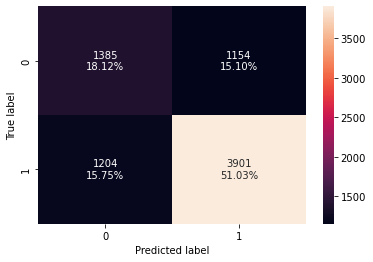

<IPython.core.display.Javascript object>

In [44]:
# Create a confusion matrix
confusion_matrix_sklearn(bagging, X_test, y_test)

In [45]:
bagging_test_perf = model_performance_classification_sklearn(bagging, X_test, y_test)
bagging_test_perf

,Accuracy,Recall,Precision,F1
0,0.6915,0.7642,0.7717,0.7679


<IPython.core.display.Javascript object>

**Observation:**
* The `Bagging Classifier` model is overfitting. It performs well on the train data but not the test data.
* The `Bagging Classsifier` model gives a slightly higher F1 Score compare to the `Decision tree` model.

#### Random Forest

In [46]:
# Building a random forest model
rand_forest = RandomForestClassifier(class_weight="balanced", random_state=1)
rand_forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

<IPython.core.display.Javascript object>

**Checking the performance on the train set**

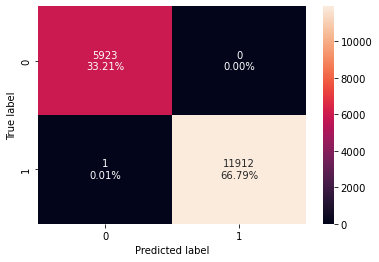

<IPython.core.display.Javascript object>

In [47]:
# Create a confusion matrix
confusion_matrix_sklearn(rand_forest, X_train, y_train)

In [48]:
rand_forest_train_perf = model_performance_classification_sklearn(
    rand_forest, X_train, y_train
)
rand_forest_train_perf

,Accuracy,Recall,Precision,F1
0,0.9999,0.9999,1.0000,1.0000


<IPython.core.display.Javascript object>

**Checking the performance on the test set**

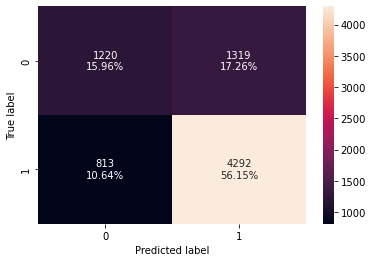

<IPython.core.display.Javascript object>

In [49]:
# Create a confusion matrix
confusion_matrix_sklearn(rand_forest, X_test, y_test)

In [50]:
rand_forest_test_perf = model_performance_classification_sklearn(
    rand_forest, X_test, y_test
)
rand_forest_test_perf

,Accuracy,Recall,Precision,F1
0,0.7211,0.8407,0.7649,0.8010


<IPython.core.display.Javascript object>

**Observation:**
* The `Random Forest` model is overfitting. It performs well on the train data but not on the test data.
* The `Random Forest` model gives higher F1 Score than `Decision Tree` and `Bagging Classifier` models

### Boosting Model

#### AdaBoost Classifier

In [51]:
# Model building with AdaBoost Classifier
adaboost = AdaBoostClassifier(random_state=1)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

**Checking the performance on the train set**

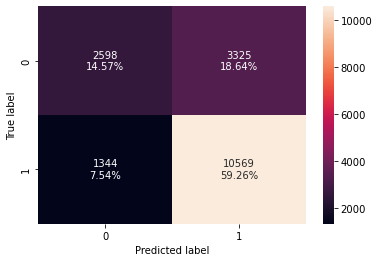

<IPython.core.display.Javascript object>

In [52]:
# create a confusion matrix
confusion_matrix_sklearn(adaboost, X_train, y_train)

In [53]:
adaboost_train_perf = model_performance_classification_sklearn(
    adaboost, X_train, y_train
)
adaboost_train_perf

,Accuracy,Recall,Precision,F1
0,0.7382,0.8872,0.7607,0.8191


<IPython.core.display.Javascript object>

**Checking the performance on the test set**

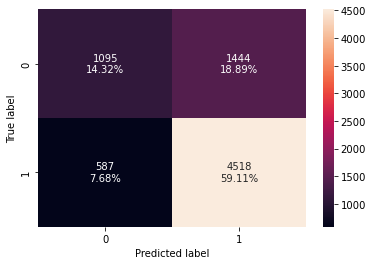

<IPython.core.display.Javascript object>

In [54]:
# Create a confusion matrix
confusion_matrix_sklearn(adaboost, X_test, y_test)

In [55]:
adaboost_test_perf = model_performance_classification_sklearn(adaboost, X_test, y_test)
adaboost_test_perf

,Accuracy,Recall,Precision,F1
0,0.7343,0.8850,0.7578,0.8165


<IPython.core.display.Javascript object>

**Observation:**
* The `AdaBoost Classifier` model seems to perform generalized on both train and test set.
* The `AdaBoost Classifier` model gives a higher F1 Score compared to `Random Forest` ,`Decision Tree` and `Bagging Classifier` models

#### Gradient Boosting Classifier

In [56]:
# Model Building with Gradient Boosting Classifier
gboosting = GradientBoostingClassifier(random_state=1)
gboosting.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

**Checking the performance on the train set**

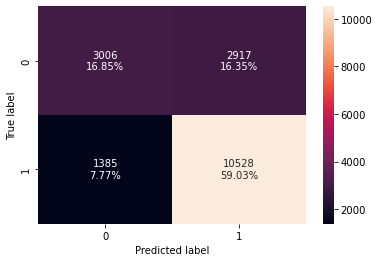

<IPython.core.display.Javascript object>

In [57]:
# Create a confusion matrix
confusion_matrix_sklearn(gboosting, X_train, y_train)

In [58]:
gboosting_train_perf = model_performance_classification_sklearn(
    gboosting, X_train, y_train
)
gboosting_train_perf

,Accuracy,Recall,Precision,F1
0,0.7588,0.8837,0.7830,0.8303


<IPython.core.display.Javascript object>

**Checking the performance on the test set**

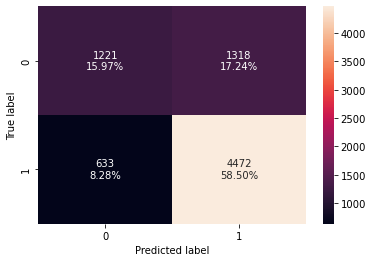

<IPython.core.display.Javascript object>

In [59]:
# Create a confusion matrix
confusion_matrix_sklearn(gboosting, X_test, y_test)

In [60]:
gboosting_test_perf = model_performance_classification_sklearn(
    gboosting, X_test, y_test
)
gboosting_test_perf

,Accuracy,Recall,Precision,F1
0,0.7448,0.8760,0.7724,0.8209


<IPython.core.display.Javascript object>

**Observation:**
* The `Gradient Boosting Classifier` model performs generalized on both train and test data. 
* The `Gradient Boosting Classifier`gives similar F1 Score to the `AdaBoost Classifier` model.

#### XGBoost Classifier

In [61]:
# Model building using XGBoost Classifier
xgboost = XGBClassifier(random_state=1, eval_metric="logloss")
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

<IPython.core.display.Javascript object>

**Checking the performance on the train set**

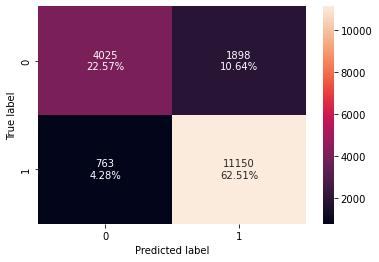

<IPython.core.display.Javascript object>

In [62]:
# Create a confusion matrix
confusion_matrix_sklearn(xgboost, X_train, y_train)

In [63]:
xgboost_train_perf = model_performance_classification_sklearn(xgboost, X_train, y_train)
xgboost_train_perf

,Accuracy,Recall,Precision,F1
0,0.8508,0.9360,0.8545,0.8934


<IPython.core.display.Javascript object>

**Checking the performance on the test set**

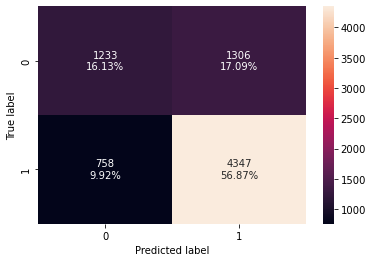

<IPython.core.display.Javascript object>

In [64]:
# Create a confusion matrix
confusion_matrix_sklearn(xgboost, X_test, y_test)

In [65]:
xgboost_test_perf = model_performance_classification_sklearn(xgboost, X_test, y_test)
xgboost_test_perf

,Accuracy,Recall,Precision,F1
0,0.7300,0.8515,0.7690,0.8081


<IPython.core.display.Javascript object>

**Observation:**
* The `XGBoost` model is overfitting. It performs well on the train data but not on the test data.
* The `XGBoost` model gives a similar F1 Score as the `Gradient Boosting Classifier`and `AdaBoost Classifier` models.

### Stacking Model

In [66]:
# Model building using Stacking Model
estimators = [
    ("AdaBoost", adaboost),
    ("Gradient Boosting", gboosting),
    ("Random Forest", rand_forest),
    ("Decision Tree", dTree),
    ("Bagging", bagging),
]

final_estimator = xgboost

stacking = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

stacking.fit(X_train, y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(class_weight='balanced',
                                                       random_state=1)),
                               ('Decision Tree',
                                DecisionTreeClassifier(random_state=1)),
                               ('Bagging', BaggingClassifier(random_state=1))],
                   final_estimator=XGBClass...
                                                 feature_types=None, gamma=None,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                        

<IPython.core.display.Javascript object>

**Checking the performance on the train set**

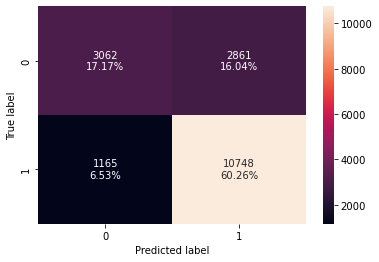

<IPython.core.display.Javascript object>

In [67]:
# Create a confusion matrix
confusion_matrix_sklearn(stacking, X_train, y_train)

In [68]:
stacking_train_perf = model_performance_classification_sklearn(
    stacking, X_train, y_train
)
stacking_train_perf

,Accuracy,Recall,Precision,F1
0,0.7743,0.9022,0.7898,0.8423


<IPython.core.display.Javascript object>

**Checking the performance on the test set**

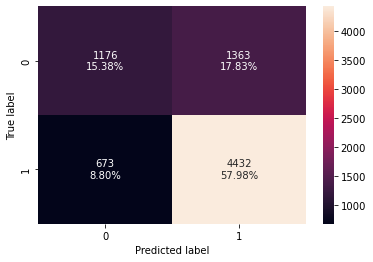

<IPython.core.display.Javascript object>

In [69]:
# Create a confusion matrix
confusion_matrix_sklearn(stacking, X_test, y_test)

In [70]:
stacking_test_perf = model_performance_classification_sklearn(stacking, X_test, y_test)
stacking_test_perf

,Accuracy,Recall,Precision,F1
0,0.7336,0.8682,0.7648,0.8132


<IPython.core.display.Javascript object>

**Observation:**
* The `Stacking` model is slightly overfitting. 
* The `Stacking` model gives a similar F1 Score as `Gradient Boosting Classifier`, `AdaBoost Classifier`, and `XGBoost` model.

## Summary

**Train set performance**

In [71]:
models_train_comp_df = pd.concat(
    [
        dTree_train_perf.T,
        bagging_train_perf.T,
        rand_forest_train_perf.T,
        adaboost_train_perf.T,
        gboosting_train_perf.T,
        xgboost_train_perf.T,
        stacking_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest",
    "AdaBoost Classifier",
    "Gradient Boosting Classifier",
    "XGBoosting Classifier",
    "Stacking",
]

print("Train set performance comparison:")
models_train_comp_df

Train set performance comparison:


,Decision Tree,Bagging Classifier,Random Forest,AdaBoost Classifier,Gradient Boosting Classifier,XGBoosting Classifier,Stacking
Accuracy,1.0000,0.9852,0.9999,0.7382,0.7588,0.8508,0.7743
Recall,1.0000,0.9860,0.9999,0.8872,0.8837,0.9360,0.9022
Precision,1.0000,0.9918,1.0000,0.7607,0.7830,0.8545,0.7898
F1,1.0000,0.9889,1.0000,0.8191,0.8303,0.8934,0.8423


<IPython.core.display.Javascript object>

**Test set performance**

In [72]:
models_test_comp_df = pd.concat(
    [
        dTree_test_perf.T,
        bagging_test_perf.T,
        rand_forest_test_perf.T,
        adaboost_test_perf.T,
        gboosting_test_perf.T,
        xgboost_test_perf.T,
        stacking_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest",
    "AdaBoost Classifier",
    "Gradient Boosting Classifier",
    "XGBoosting Classifier",
    "Stacking",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree,Bagging Classifier,Random Forest,AdaBoost Classifier,Gradient Boosting Classifier,XGBoosting Classifier,Stacking
Accuracy,0.6648,0.6915,0.7211,0.7343,0.7448,0.7300,0.7336
Recall,0.7428,0.7642,0.8407,0.8850,0.8760,0.8515,0.8682
Precision,0.7522,0.7717,0.7649,0.7578,0.7724,0.7690,0.7648
F1,0.7475,0.7679,0.8010,0.8165,0.8209,0.8081,0.8132


<IPython.core.display.Javascript object>

##  Will tuning the hyperparameters improve the model performance?

#### Hyperparameter Tuning - Decision Tree

In [73]:
# Choose the type of classifier.
dTree_tuned = DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.72}, random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 30),
    "min_samples_leaf": [15, 12, 14],
    "max_leaf_nodes": [12, 13, 15, 10, 25],
    "min_impurity_decrease": [0.0001, 0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dTree_tuned, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dTree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dTree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.72}, max_depth=9,
                       max_leaf_nodes=25, min_impurity_decrease=0.0001,
                       min_samples_leaf=12, random_state=1)

<IPython.core.display.Javascript object>

**Checking the performance on the train set**

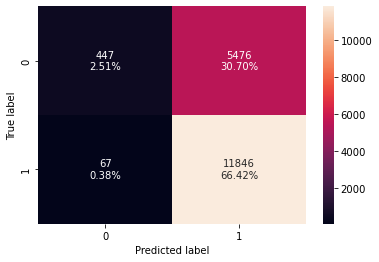

<IPython.core.display.Javascript object>

In [74]:
# Creating confusion matrix
confusion_matrix_sklearn(dTree_tuned, X_train, y_train)

In [75]:
dTree_tuned_train_perf = model_performance_classification_sklearn(
    dTree_tuned, X_train, y_train
)
dTree_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.6892,0.9944,0.6839,0.8104


<IPython.core.display.Javascript object>

**Checking the performance on the test set**

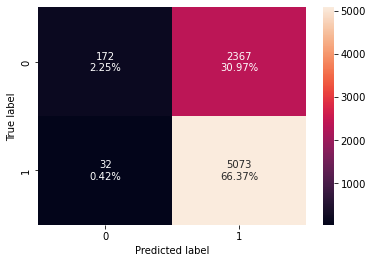

<IPython.core.display.Javascript object>

In [76]:
# Creating confusion matrix
confusion_matrix_sklearn(dTree_tuned, X_test, y_test)

In [77]:
dTree_tuned_test_perf = model_performance_classification_sklearn(
    dTree_tuned, X_test, y_test
)
dTree_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.6862,0.9937,0.6819,0.8088


<IPython.core.display.Javascript object>

**Observation:**
* Overfitting has been reduced. The model performs generalized on both train and test data.
* The `Decision Tree`model gives a high recall and 0.80 for F1 Score.

#### Hyperparameter Tuning - Bagging Classifier

In [78]:
# Choose the type of classifier.
bagging_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(80, 111, 10),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

<IPython.core.display.Javascript object>

**Checking the performance on the train set**

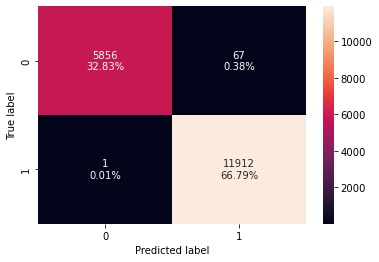

<IPython.core.display.Javascript object>

In [79]:
# Creating confusion matrix
confusion_matrix_sklearn(bagging_tuned, X_train, y_train)

In [80]:
bagging_tuned_train_perf = model_performance_classification_sklearn(
    bagging_tuned, X_train, y_train
)
bagging_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.9962,0.9999,0.9944,0.9972


<IPython.core.display.Javascript object>

**Checking the performance on the test set**

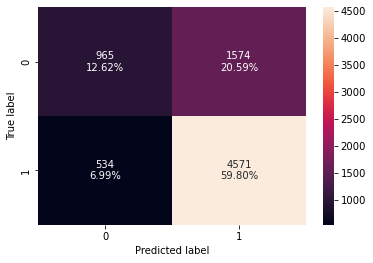

<IPython.core.display.Javascript object>

In [81]:
# Creating confusion matrix
confusion_matrix_sklearn(bagging_tuned, X_test, y_test)

In [82]:
bagging_tuned_test_perf = model_performance_classification_sklearn(
    bagging_tuned, X_test, y_test
)
bagging_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.7242,0.8954,0.7439,0.8126


<IPython.core.display.Javascript object>

**Observation:**
* The model is still overfitting.
* The F1 Score is similar to the tuned `Decision Tree` model.

#### Hyperparameter Tuning - Random Forest

In [83]:
# Choose the type of classifier.
rand_forest_tuned = RandomForestClassifier(
    class_weight="balanced", random_state=1, oob_score=True, bootstrap=True
)

parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rand_forest_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rand_forest_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rand_forest_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       oob_score=True, random_state=1)

<IPython.core.display.Javascript object>

**Checking the performance on the train set**

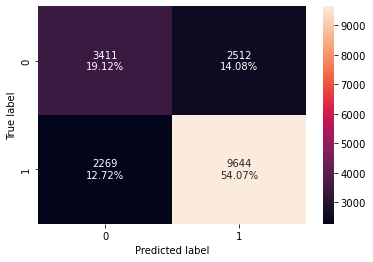

<IPython.core.display.Javascript object>

In [84]:
# Creating confusion matrix
confusion_matrix_sklearn(rand_forest_tuned, X_train, y_train)

In [85]:
rand_forest_tuned_train_perf = model_performance_classification_sklearn(
    rand_forest_tuned, X_train, y_train
)
rand_forest_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.7319,0.8095,0.7934,0.8014


<IPython.core.display.Javascript object>

**Checking the performance on the test set**

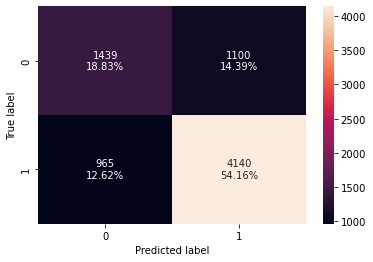

<IPython.core.display.Javascript object>

In [86]:
# Creating confusion matrix
confusion_matrix_sklearn(rand_forest_tuned, X_test, y_test)

In [87]:
rand_forest_tuned_test_perf = model_performance_classification_sklearn(
    rand_forest_tuned, X_test, y_test
)
rand_forest_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.7299,0.8110,0.7901,0.8004


<IPython.core.display.Javascript object>

**Observation:**
* Overfitting has been reduced. The model performs generalized on both train and test data.
* F1 Score is 0.80, somewhat similar to previous tuned models.

#### Hyperparameter Tuning - AdaBoost Classifier

In [88]:
# Choose the type of classifier.
adaboost_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    adaboost_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1
)  ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(
    X_train, y_train
)  ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
adaboost_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
adaboost_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

<IPython.core.display.Javascript object>

**Checking the performance on the train set**

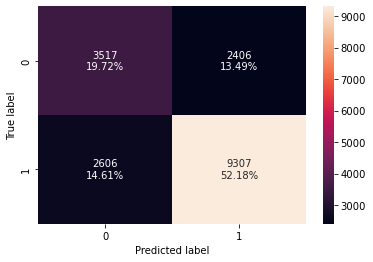

<IPython.core.display.Javascript object>

In [89]:
# Creating confusion matrix
confusion_matrix_sklearn(adaboost_tuned, X_train, y_train)

In [90]:
adaboost_tuned_train_perf = model_performance_classification_sklearn(
    adaboost_tuned, X_train, y_train
)
adaboost_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.7190,0.7812,0.7946,0.7879


<IPython.core.display.Javascript object>

**Checking the performance on the test set**

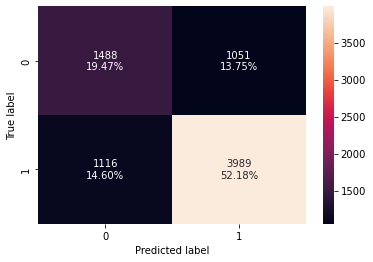

<IPython.core.display.Javascript object>

In [91]:
# Creating confusion matrix
confusion_matrix_sklearn(adaboost_tuned, X_test, y_test)

In [92]:
adaboost_tuned_test_perf = model_performance_classification_sklearn(
    adaboost_tuned, X_test, y_test
)
adaboost_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.7165,0.7814,0.7915,0.7864


<IPython.core.display.Javascript object>

**Observation:**
* Overfitting has been reduced. The model performs generalized on both train and test data.
* The F1 Score is 0.79, it is somewhat lower than other previous models.

#### Hyperparameter Tuning - Gradient Boosting Classifier

In [93]:
# Choose the type of classifier.
gboosting_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    gboosting_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1
)  ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(
    X_train, y_train
)  ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
gboosting_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gboosting_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

<IPython.core.display.Javascript object>

**Checking the performance on the train set**

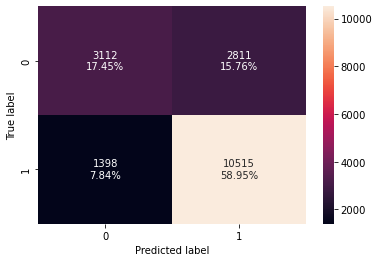

<IPython.core.display.Javascript object>

In [94]:
# Creating confusion matrix
confusion_matrix_sklearn(gboosting_tuned, X_train, y_train)

In [95]:
gboosting_tuned_train_perf = model_performance_classification_sklearn(
    gboosting_tuned, X_train, y_train
)
gboosting_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.7640,0.8826,0.7891,0.8332


<IPython.core.display.Javascript object>

**Checking the performance on the test set**

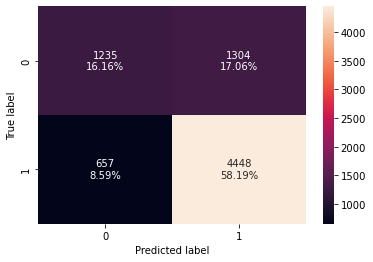

<IPython.core.display.Javascript object>

In [96]:
# Creating confusion matrix
confusion_matrix_sklearn(gboosting_tuned, X_test, y_test)

In [97]:
gboosting_tuned_test_perf = model_performance_classification_sklearn(
    gboosting_tuned, X_test, y_test
)
gboosting_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.7435,0.8713,0.7733,0.8194


<IPython.core.display.Javascript object>

**Observation:**
* Overfitting has been reduced. The model performs well on both train and test data.
* The F1 Score is 0.82, it is higher than other previous models.

#### Hyperparameter Tuning - XGBoost Classifier

In [98]:
# Choose the type of classifier.
xgboost_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    xgboost_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1
)  ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(
    X_train, y_train
)  ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
xgboost_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgboost_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

<IPython.core.display.Javascript object>

**Checking the performance on the train set**

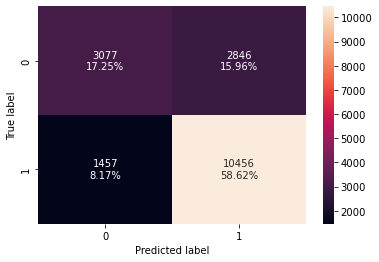

<IPython.core.display.Javascript object>

In [99]:
# Creating confusion matrix
confusion_matrix_sklearn(xgboost_tuned, X_train, y_train)

In [100]:
xgboost_tuned_train_perf = model_performance_classification_sklearn(
    xgboost_tuned, X_train, y_train
)
xgboost_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.7587,0.8777,0.7860,0.8293


<IPython.core.display.Javascript object>

**Checking the performance on the test set**

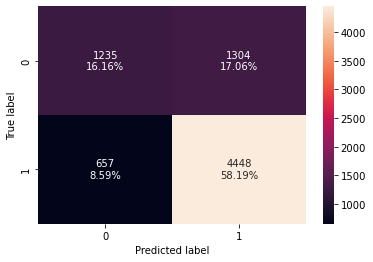

<IPython.core.display.Javascript object>

In [101]:
# Creating confusion matrix
confusion_matrix_sklearn(gboosting_tuned, X_test, y_test)

In [102]:
xgboost_tuned_test_perf = model_performance_classification_sklearn(
    xgboost_tuned, X_test, y_test
)
xgboost_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.7482,0.8727,0.7775,0.8223


<IPython.core.display.Javascript object>

**Observation:**
* Overfitting has been reduced. The model performs well on both train and test data.
* The F1 Score is 0.82.


#### Hyperparameter Tuning - Stacking Model

In [103]:
# Model building using Stacking Model
estimators = [
    ("AdaBoost", adaboost_tuned),
    ("Gradient Boosting", gboosting_tuned),
    ("Random Forest", rand_forest_tuned),
    ("Decision Tree", dTree_tuned),
    ("Bagging", bagging_tuned),
]

final_estimator = xgboost_tuned

stacking_tuned = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)

stacking_tuned.fit(X_train, y_train)

StackingClassifier(estimators=[('AdaBoost',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                         max_depth=1,
                                                                                         random_state=1),
                                                   learning_rate=0.1,
                                                   n_estimators=100,
                                                   random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                            

<IPython.core.display.Javascript object>

**Checking the performance on the train set**

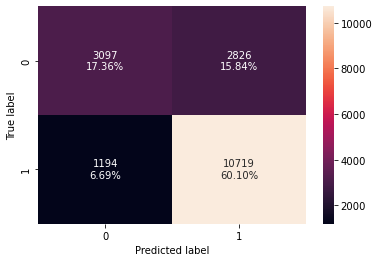

<IPython.core.display.Javascript object>

In [104]:
# Creating confusion matrix
confusion_matrix_sklearn(stacking_tuned, X_train, y_train)

In [105]:
stacking_tuned_train_perf = model_performance_classification_sklearn(
    stacking_tuned, X_train, y_train
)
stacking_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.7746,0.8998,0.7914,0.8421


<IPython.core.display.Javascript object>

**Checking the performance on the test set**

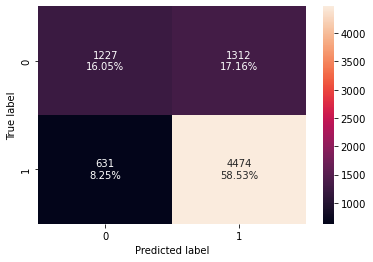

<IPython.core.display.Javascript object>

In [106]:
# Creating confusion matrix
confusion_matrix_sklearn(stacking_tuned, X_test, y_test)

In [107]:
stacking_tuned_test_perf = model_performance_classification_sklearn(
    stacking_tuned, X_test, y_test
)
stacking_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.7458,0.8764,0.7732,0.8216


<IPython.core.display.Javascript object>

**Observation:**
* Overfitting has been reduced. The model performs generalized on both train and test data.
* The F1 Score is 0.82.

## Summary

**Tuned Models Train set performance**

In [108]:
tuned_models_train_comp_df = pd.concat(
    [
        dTree_tuned_train_perf.T,
        bagging_tuned_train_perf.T,
        rand_forest_tuned_train_perf.T,
        adaboost_tuned_train_perf.T,
        gboosting_tuned_train_perf.T,
        xgboost_tuned_train_perf.T,
        stacking_tuned_train_perf.T,
    ],
    axis=1,
)
tuned_models_train_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest",
    "AdaBoost Classifier",
    "Gradient Boosting Classifier",
    "XGBoosting Classifier",
    "Stacking",
]

print("Train set performance comparison:")
tuned_models_train_comp_df

Train set performance comparison:


,Decision Tree,Bagging Classifier,Random Forest,AdaBoost Classifier,Gradient Boosting Classifier,XGBoosting Classifier,Stacking
Accuracy,0.6892,0.9962,0.7319,0.7190,0.7640,0.7587,0.7746
Recall,0.9944,0.9999,0.8095,0.7812,0.8826,0.8777,0.8998
Precision,0.6839,0.9944,0.7934,0.7946,0.7891,0.7860,0.7914
F1,0.8104,0.9972,0.8014,0.7879,0.8332,0.8293,0.8421


<IPython.core.display.Javascript object>

**Tuned Model Test set performance**

In [109]:
tuned_models_test_comp_df = pd.concat(
    [
        dTree_tuned_test_perf.T,
        bagging_tuned_test_perf.T,
        rand_forest_tuned_test_perf.T,
        adaboost_tuned_test_perf.T,
        gboosting_tuned_test_perf.T,
        xgboost_tuned_test_perf.T,
        stacking_tuned_test_perf.T,
    ],
    axis=1,
)
tuned_models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest",
    "AdaBoost Classifier",
    "Gradient Boosting Classifier",
    "XGBoosting Classifier",
    "Stacking",
]

print("Test set performance comparison:")
tuned_models_test_comp_df

Test set performance comparison:


,Decision Tree,Bagging Classifier,Random Forest,AdaBoost Classifier,Gradient Boosting Classifier,XGBoosting Classifier,Stacking
Accuracy,0.6862,0.7242,0.7299,0.7165,0.7435,0.7482,0.7458
Recall,0.9937,0.8954,0.8110,0.7814,0.8713,0.8727,0.8764
Precision,0.6819,0.7439,0.7901,0.7915,0.7733,0.7775,0.7732
F1,0.8088,0.8126,0.8004,0.7864,0.8194,0.8223,0.8216


<IPython.core.display.Javascript object>

## Model Performance Comparison and Conclusions

In [110]:
# training performance comparison

all_models_train_comp_df = pd.concat(
    [
        dTree_train_perf.T,
        dTree_tuned_train_perf.T,
        bagging_train_perf.T,
        bagging_tuned_train_perf.T,
        rand_forest_train_perf.T,
        rand_forest_tuned_train_perf.T,
        adaboost_train_perf.T,
        adaboost_tuned_train_perf.T,
        gboosting_train_perf.T,
        gboosting_tuned_train_perf.T,
        xgboost_train_perf.T,
        xgboost_tuned_train_perf.T,
        stacking_train_perf.T,
        stacking_tuned_train_perf.T,
    ],
    axis=1,
)
all_models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
    "Stacking Classifier Tuned",
]
print("Training performance comparison:")
all_models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier,Stacking Classifier Tuned
Accuracy,1.0000,0.6892,0.9852,0.9962,0.9999,0.7319,0.7382,0.7190,0.7588,0.7640,0.8508,0.7587,0.7743,0.7746
Recall,1.0000,0.9944,0.9860,0.9999,0.9999,0.8095,0.8872,0.7812,0.8837,0.8826,0.9360,0.8777,0.9022,0.8998
Precision,1.0000,0.6839,0.9918,0.9944,1.0000,0.7934,0.7607,0.7946,0.7830,0.7891,0.8545,0.7860,0.7898,0.7914
F1,1.0000,0.8104,0.9889,0.9972,1.0000,0.8014,0.8191,0.7879,0.8303,0.8332,0.8934,0.8293,0.8423,0.8421


<IPython.core.display.Javascript object>

In [111]:
# testing performance comparison

all_models_test_comp_df = pd.concat(
    [
        dTree_test_perf.T,
        dTree_tuned_test_perf.T,
        bagging_test_perf.T,
        bagging_tuned_test_perf.T,
        rand_forest_test_perf.T,
        rand_forest_tuned_test_perf.T,
        adaboost_test_perf.T,
        adaboost_tuned_test_perf.T,
        gboosting_test_perf.T,
        gboosting_tuned_test_perf.T,
        xgboost_test_perf.T,
        xgboost_tuned_test_perf.T,
        stacking_test_perf.T,
        stacking_tuned_test_perf.T,
    ],
    axis=1,
)
all_models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
    "Stacking Classifier Tuned",
]
print("Test performance comparison:")
all_models_test_comp_df

Test performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier,Stacking Classifier Tuned
Accuracy,0.6648,0.6862,0.6915,0.7242,0.7211,0.7299,0.7343,0.7165,0.7448,0.7435,0.7300,0.7482,0.7336,0.7458
Recall,0.7428,0.9937,0.7642,0.8954,0.8407,0.8110,0.8850,0.7814,0.8760,0.8713,0.8515,0.8727,0.8682,0.8764
Precision,0.7522,0.6819,0.7717,0.7439,0.7649,0.7901,0.7578,0.7915,0.7724,0.7733,0.7690,0.7775,0.7648,0.7732
F1,0.7475,0.8088,0.7679,0.8126,0.8010,0.8004,0.8165,0.7864,0.8209,0.8194,0.8081,0.8223,0.8132,0.8216


<IPython.core.display.Javascript object>

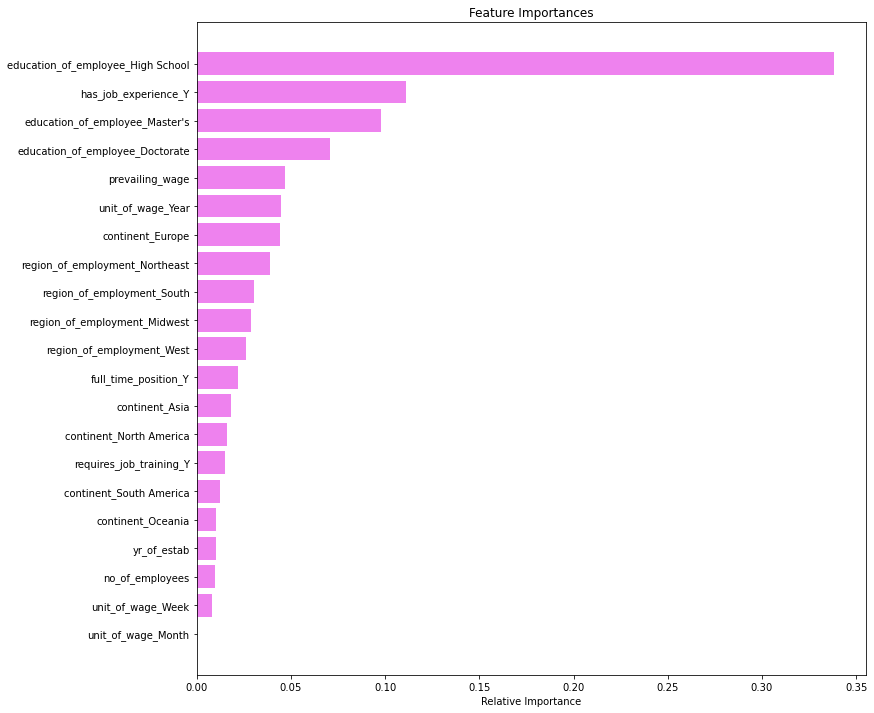

<IPython.core.display.Javascript object>

In [112]:
feature_names = X_train.columns
importances = xgboost_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Actionable Insights and Recommendations

**Insights**
- According to the analyis above, the education level of the worker, job experience, and prevailing yearly wage would contribute an influence to the certification of the work visa. 
- A foreign worker must at least have a high degree, but preferrably Master's and Doctorate. The higher the eduction degree, the higher the chance of certification.
- Foreign workers that possessed work experience are more likely to certify for work visa.
- US employers are encouraged to offer a high annual prevailing wage to increase the chance of certification.

**Recommendation**
- US employers should target workers that hold Masters and Doctorate degree.
- Having job experience would enhance the chance of certification but we will need more data to estimate the minimum year of experience for a good chance of visa certification.
- US employers could offer high an annual prevailing wage to increase the chance of certification (~>$80,000). However, wages are varies across regions and there are lot of factors that could impact the wage such as expenses, and taxation. Need more data to determine the right range for annual wage.

# <a name='link1'>Appendix: Detailed Exploratory Data Analysis (EDA)</a>

### Univariate Analysis

#### Year Established
`yr_of_estab`: Year in which the employer's company was established

In [113]:
df.yr_of_estab.describe()

count   25480.0000
mean     1979.4099
std        42.3669
min      1800.0000
25%      1976.0000
50%      1997.0000
75%      2005.0000
max      2016.0000
Name: yr_of_estab, dtype: float64

<IPython.core.display.Javascript object>

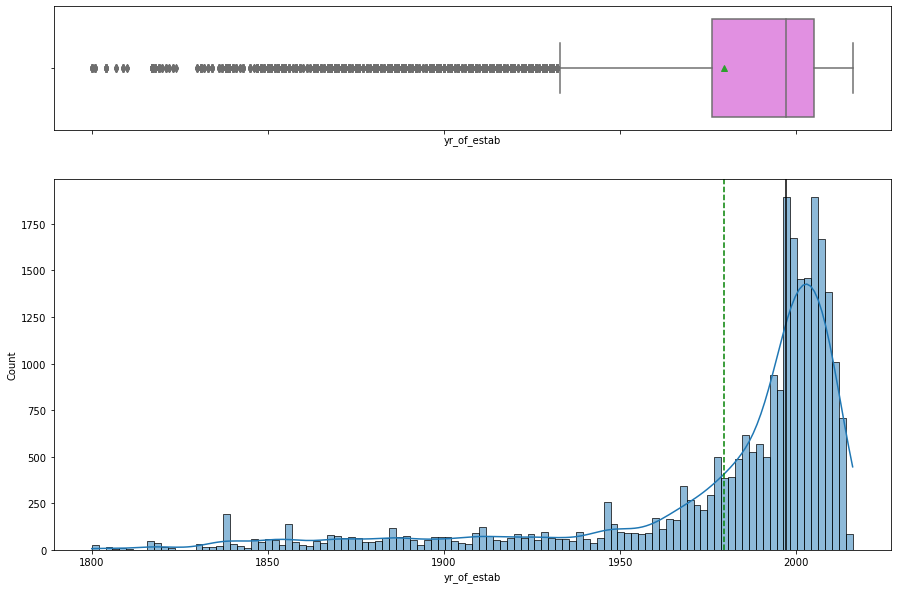

<IPython.core.display.Javascript object>

In [114]:
histogram_boxplot(df, "yr_of_estab", kde=True)

* There are companies that established very early in the 1800s.
* There are companies that established very recent in 2016.
* On average, the majority of the companies established in 1979.
* The distribution in left-skewed indicating the majority of companies established in the 2000s.

#### Number of Employees
`no_of_employees`: Number of employees in the employer's company

In [115]:
df.no_of_employees.describe()

count    25480.0000
mean      5667.0892
std      22877.9175
min         11.0000
25%       1022.0000
50%       2109.0000
75%       3504.0000
max     602069.0000
Name: no_of_employees, dtype: float64

<IPython.core.display.Javascript object>

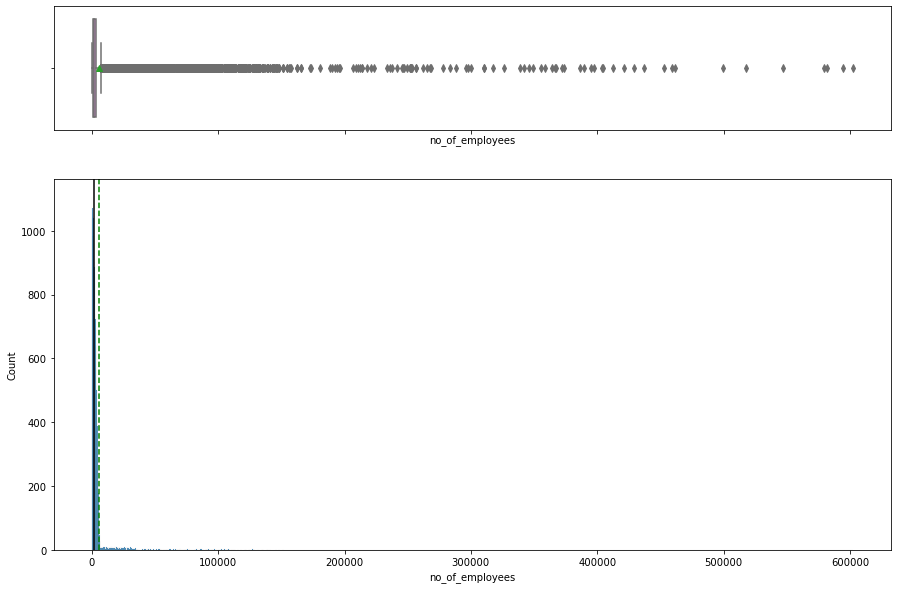

<IPython.core.display.Javascript object>

In [116]:
histogram_boxplot(df, "no_of_employees")

* Minimum employees is 11, maximum employees is 602,069.
* The number of employees can infer the size of the company. Large companies tend to have more employees.
* There are outliers. 

#### Prevailing Wage
`prevailing_wage`: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.

In [117]:
df.prevailing_wage.describe()

count    25480.0000
mean     74455.8146
std      52815.9423
min          2.1367
25%      34015.4800
50%      70308.2100
75%     107735.5125
max     319210.2700
Name: prevailing_wage, dtype: float64

<IPython.core.display.Javascript object>

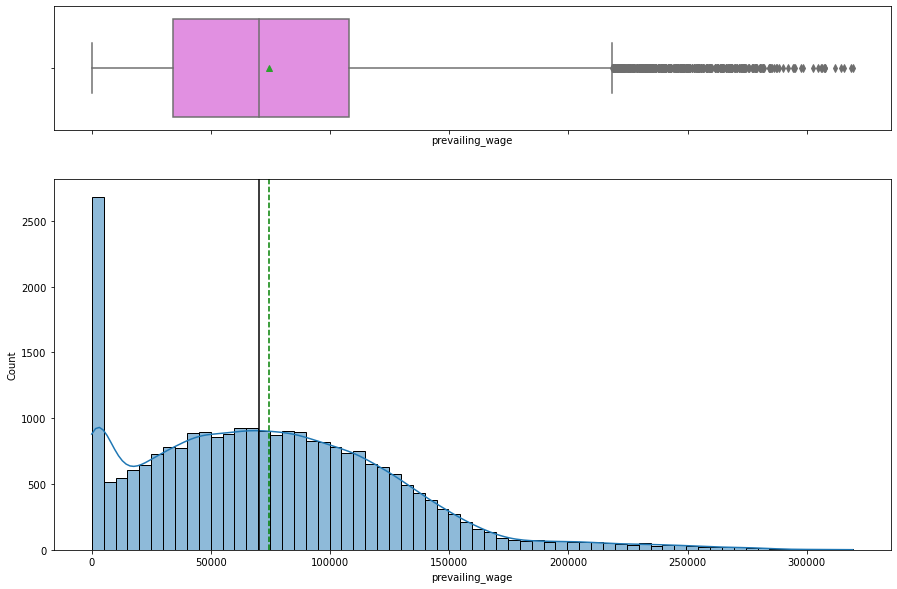

<IPython.core.display.Javascript object>

In [118]:
histogram_boxplot(df, "prevailing_wage", kde=True)

* The average prevailing wage is 74455 dollars.
* The majority of the prevailing wage ranges from 35000 to 110000 dollars.
* There are outliers.
* The distribution is right-skewed.

#### Wage Unit
`unit_of_wage`: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.

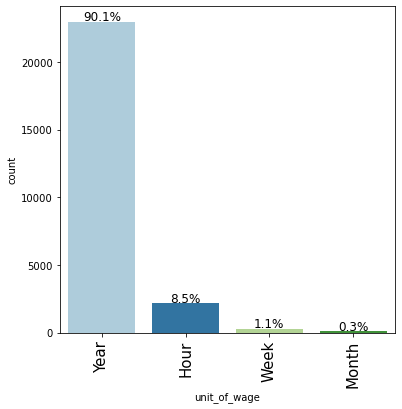

<IPython.core.display.Javascript object>

In [119]:
labeled_barplot(df, "unit_of_wage", perc=True)

* Employees who get paid yearly (90.1%).
* Employees who get paid hourly (8.5%).
* Employees who get paid monthly (0.3%).
* Employees who get paid weekly (1.1%).

#### Employee Education
`education_of_employee`: Information of education of the employee

In [120]:
df.education_of_employee.value_counts()

Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64

<IPython.core.display.Javascript object>

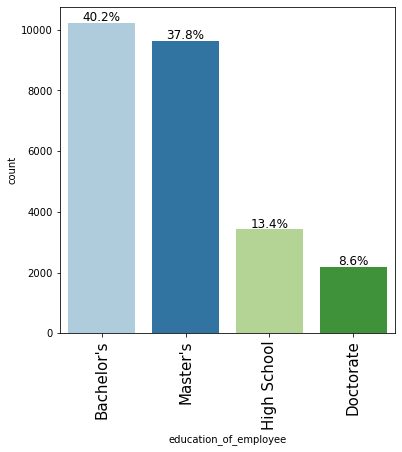

<IPython.core.display.Javascript object>

In [121]:
labeled_barplot(df, "education_of_employee", perc=True)

* Employees who earn a Bachelor's degree (40.2%).
* Employees who earn a Master's degree (37.8%).
* Employees who earn a High School degree (13.4%).
* Employees who earn a Doctorate degree (8.6%).

#### Job Experience
`has_job_experience`: Does the employee has any job experience? Y= Yes; N = No

In [122]:
df.has_job_experience.value_counts()

Y    14802
N    10678
Name: has_job_experience, dtype: int64

<IPython.core.display.Javascript object>

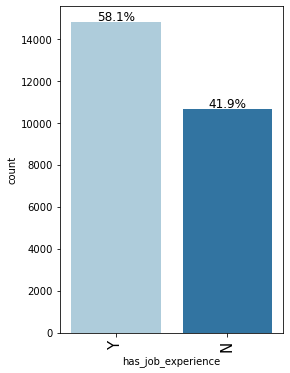

<IPython.core.display.Javascript object>

In [123]:
labeled_barplot(df, "has_job_experience", perc=True)

* Employees with job experience (58.1%).
* Employees without job experience (41.9%).

#### Job Training
`requires_job_training`: Does the employee require any job training? Y = Yes; N = No

In [124]:
df.requires_job_training.value_counts()

N    22525
Y     2955
Name: requires_job_training, dtype: int64

<IPython.core.display.Javascript object>

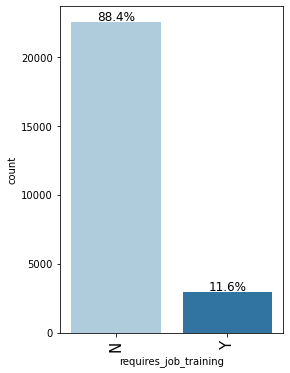

<IPython.core.display.Javascript object>

In [125]:
labeled_barplot(df, "requires_job_training", perc=True)

* Employees who require job training (11.6%).
* Employees who do not require job training (88.4%).

#### Continent
`continent`: Information of continent the employee

In [126]:
df.continent.value_counts()

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64

<IPython.core.display.Javascript object>

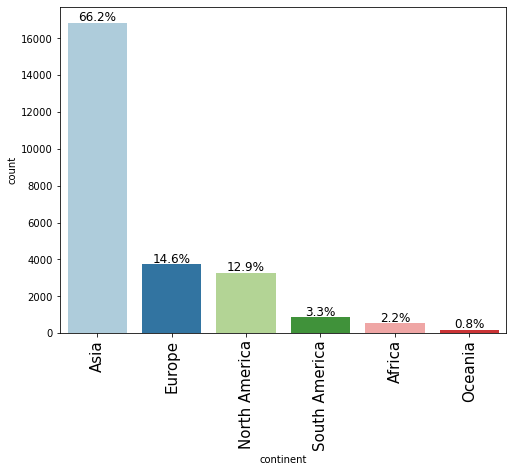

<IPython.core.display.Javascript object>

In [127]:
labeled_barplot(df, "continent", perc=True)

* The majority of application come from Asia (66.2%).
* Applications come from Europe (14.6%).
* Applications come from North America (12.9%).

#### Employment Region
`region_of_employment`: Information of foreign worker's intended region of employment in the US.

In [128]:
df.region_of_employment.value_counts()

Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64

<IPython.core.display.Javascript object>

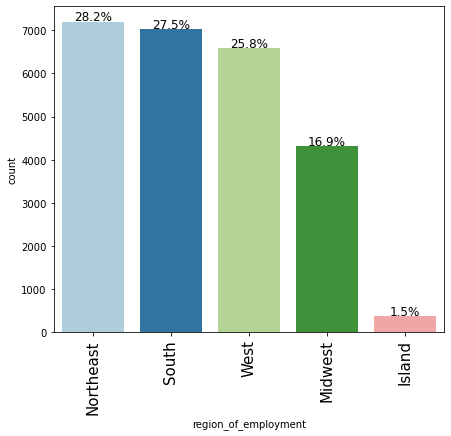

<IPython.core.display.Javascript object>

In [129]:
labeled_barplot(df, "region_of_employment", perc=True)

* Employees who intended to work in the Northeast region (28.2%).
* Employees who intended to work in the South region (27.5%).
* Employees who intended to work in the West region (25.8%).
* Employees who intended to work in the Midwest region (16.9%).
* Employees who intended to work in the Island region (1.5%).

#### Position Type
`full_time_position`: Is the position of work full-time? Y = Full Time Position; N = Part Time Position

In [130]:
df.full_time_position.value_counts()

Y    22773
N     2707
Name: full_time_position, dtype: int64

<IPython.core.display.Javascript object>

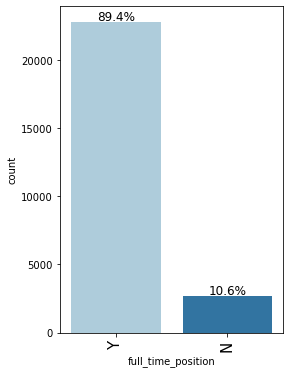

<IPython.core.display.Javascript object>

In [131]:
labeled_barplot(df, "full_time_position", perc=True)

* Full time position (89.4%).
* Part time position (10.6%).

#### Case Status
`case_status`: Flag indicating if the Visa was certified or denied

In [132]:
df.case_status.value_counts()

Certified    17018
Denied        8462
Name: case_status, dtype: int64

<IPython.core.display.Javascript object>

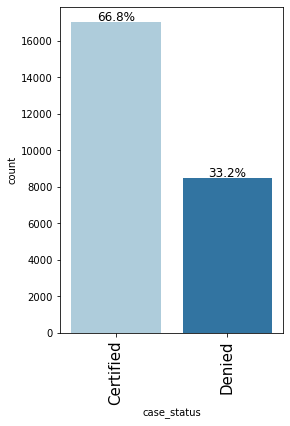

<IPython.core.display.Javascript object>

In [133]:
labeled_barplot(df, "case_status", perc=True)

* Certified applications (66.8%).
* Denied applications (33.2%).

### Bivarate Analysis

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

####  Correlation

<AxesSubplot:>

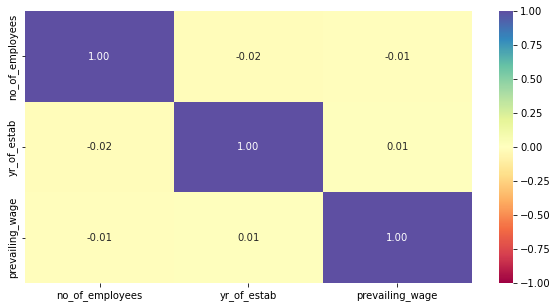

<IPython.core.display.Javascript object>

In [134]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)

* No significant correlation.

### Education and Case Status
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

In [135]:
df.groupby(["education_of_employee"])["case_status"].value_counts(1)

education_of_employee  case_status
Bachelor's             Certified     0.6221
                       Denied        0.3779
Doctorate              Certified     0.8723
                       Denied        0.1277
High School            Denied        0.6596
                       Certified     0.3404
Master's               Certified     0.7863
                       Denied        0.2137
Name: case_status, dtype: float64

<IPython.core.display.Javascript object>

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


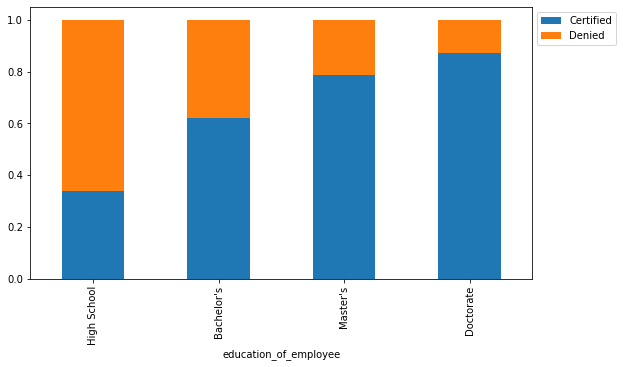

<IPython.core.display.Javascript object>

In [136]:
stacked_barplot(df, "education_of_employee", "case_status")

* 66% of employees with a high school degree have been denied visa application.
* 38% of employees with a Bachelor's degree have been denied visa application.
* 21% of employees with a Master's degree have been denied visa application.
* 13% of employees with a Doctorate degree have been denied visa application.

**Observation:** 
* It appears that employees with higher education degree would be more likely to grant visa application. 
* Education level does impact the visa certification.

### Region and Case Status
2. How does the visa status vary across different continents? 

In [137]:
df.groupby(["continent"])["case_status"].value_counts(1)

continent      case_status
Africa         Certified     0.7205
               Denied        0.2795
Asia           Certified     0.6531
               Denied        0.3469
Europe         Certified     0.7923
               Denied        0.2077
North America  Certified     0.6188
               Denied        0.3812
Oceania        Certified     0.6354
               Denied        0.3646
South America  Certified     0.5786
               Denied        0.4214
Name: case_status, dtype: float64

<IPython.core.display.Javascript object>

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


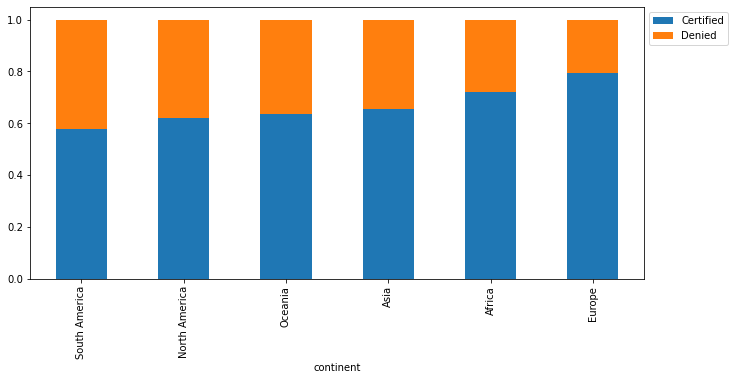

<IPython.core.display.Javascript object>

In [138]:
stacked_barplot(df, "continent", "case_status")

* Certifed in South America (58%).
* Certifed in North America (62%).
* Certifed in Oceania (64%).
* Certifed in Asia (65%).
* Certifed in Africa (72%).
* Certifed in Europe (79%).

**Observation:**
* Visa certification varies across continents.
* Unsure why the rate of certication is higher in Europe, Africa, and Asia compared to South America, North America, and Oceania.


### The relationship between `continent` and `education_of_employee`

In [139]:
df.groupby(["continent"])["education_of_employee"].value_counts(
    1, sort=True, ascending=True
)

continent      education_of_employee
Africa         Doctorate               0.0980
               High School             0.1198
               Bachelor's              0.2595
               Master's                0.5227
Asia           Doctorate               0.0547
               High School             0.1358
               Master's                0.3843
               Bachelor's              0.4251
Europe         High School             0.1313
               Doctorate               0.2267
               Master's                0.2939
               Bachelor's              0.3481
North America  Doctorate               0.0784
               High School             0.1218
               Bachelor's              0.3721
               Master's                0.4277
Oceania        Doctorate               0.1146
               High School             0.1875
               Bachelor's              0.3438
               Master's                0.3542
South America  Doctorate               0.10

<IPython.core.display.Javascript object>

education_of_employee  Bachelor's  Doctorate  High School  Master's    All
continent                                                                 
All                         10234       2192         3420      9634  25480
Asia                         7168        923         2290      6480  16861
Europe                       1299        846          490      1097   3732
North America                1225        258          401      1408   3292
South America                 333         89          137       293    852
Africa                        143         54           66       288    551
Oceania                        66         22           36        68    192
------------------------------------------------------------------------------------------------------------------------


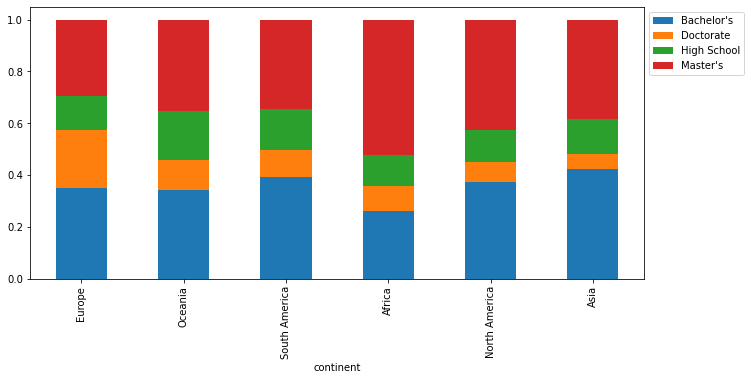

<IPython.core.display.Javascript object>

In [140]:
stacked_barplot(df, "continent", "education_of_employee")

* Europe: Doctorate(23%), Master's (29%), Bachelor's (35%), High School (13%). 
* Asia: Doctorate (5%), Master's (38%), Bachelor's (43%), High School (14%). 
* Africa: Doctorate (10%), Master's (52%), Bachelor's (26%), High School (12%). 62%
* Oceania: Doctorate (11%), Master's (35%), Bachelor's (34%), High School (19%). 46%
* South America: Doctorate (10%), Master's (34%), Bachelor's (39%), High School (16%). 44%
* North America: Doctorate (8%), Master's (43%), Bachelor's (37%), High School (12%). 51%

> Europe has the highest percentage of Doctorate holder. 

> Africa has the highest percentage of Master's holder.

> South America has the highest percentage of Bachelors's holder.

> Oceania has the highest percentage of High school degree holder.


**Observations:**

* Europeans who held a master's or higher degree (52%).
* Asians who held a master's or higher degree (43%).
* Africans who held a master's or higher degree (62%).
* Oceanians who held a master's or higher degree (46%).
* South Americans who held a master's or higher degree (44%).
* North Americans who held a master's or higher degree (51%).


### Work Experience and Case Status
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 

In [141]:
df.groupby(["has_job_experience"])["case_status"].value_counts(1)

has_job_experience  case_status
N                   Certified     0.5613
                    Denied        0.4387
Y                   Certified     0.7448
                    Denied        0.2552
Name: case_status, dtype: float64

<IPython.core.display.Javascript object>

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


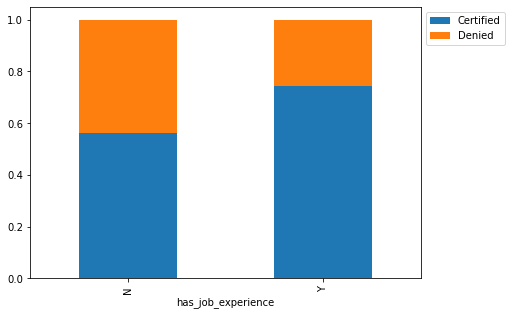

<IPython.core.display.Javascript object>

In [142]:
stacked_barplot(df, "has_job_experience", "case_status")

* 74% of employees who have job experience achieved visa certification.
* 56% of employees who do not have job experience achieved visa certification.

**Observations:**
* If workers have job experience, they have a higher chance to achieve visa certification.

### The relationship between `requires_job_training` and `case_status`

In [143]:
df.groupby(["requires_job_training"])["case_status"].value_counts(1)

requires_job_training  case_status
N                      Certified     0.6665
                       Denied        0.3335
Y                      Certified     0.6788
                       Denied        0.3212
Name: case_status, dtype: float64

<IPython.core.display.Javascript object>

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


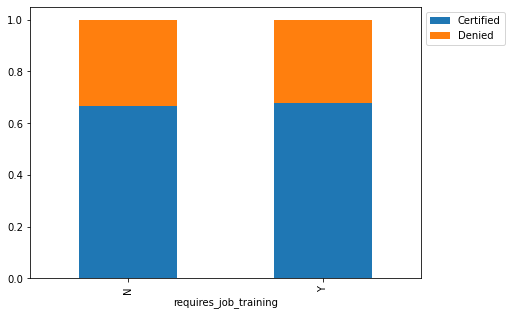

<IPython.core.display.Javascript object>

In [144]:
stacked_barplot(df, "requires_job_training", "case_status")

**Observations:**
* Job training requirement has little impact to visa certification.

### Wage Unit and Case Status
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 

In [145]:
df.groupby(["unit_of_wage"])["case_status"].value_counts(1)

unit_of_wage  case_status
Hour          Denied        0.6537
              Certified     0.3463
Month         Certified     0.6180
              Denied        0.3820
Week          Certified     0.6213
              Denied        0.3787
Year          Certified     0.6989
              Denied        0.3011
Name: case_status, dtype: float64

<IPython.core.display.Javascript object>

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


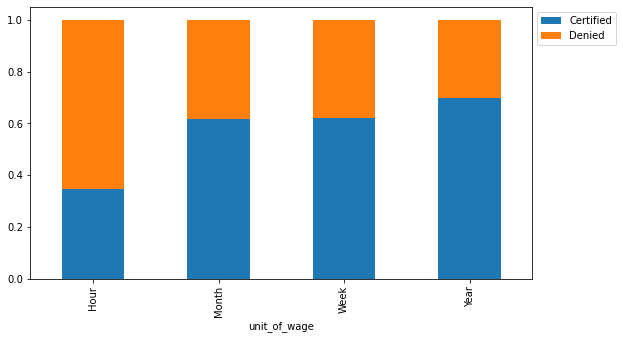

<IPython.core.display.Javascript object>

In [146]:
stacked_barplot(df, "unit_of_wage", "case_status")

* Hourly wage: 35% rate of certification.
* Weekly wage: 62% rate of certification.
* Monthly wage: 62% rate of certification.
* Yearly wage: 70% rate of certification.

**Observation:**
* Yearly wage is mostly like to be certified for work visa.


### The relationship between `unit_of_wage` and `prevailing_wage`

<AxesSubplot:xlabel='prevailing_wage', ylabel='unit_of_wage'>

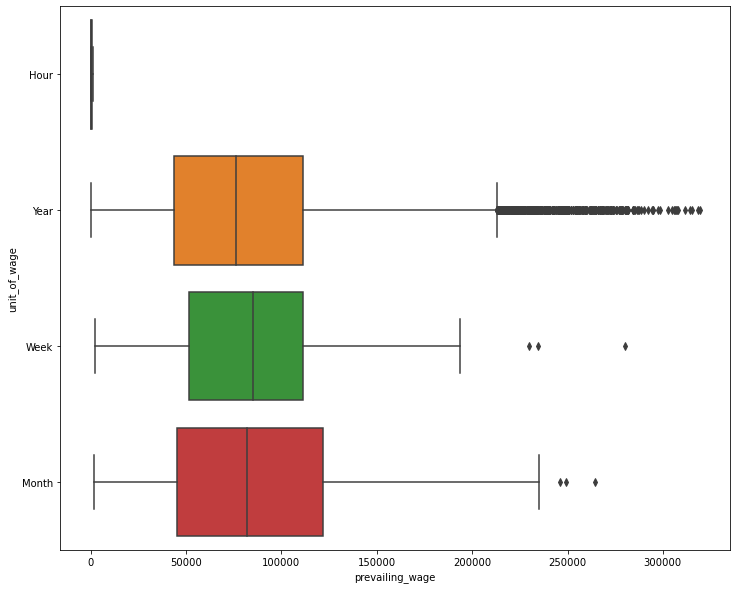

<IPython.core.display.Javascript object>

In [147]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=df, x="prevailing_wage", y="unit_of_wage")

In [148]:
df.groupby(["unit_of_wage"])["prevailing_wage"].describe().T

unit_of_wage,Hour,Month,Week,Year
count,2157.0000,89.0000,272.0000,22962.0000
mean,414.5705,87592.8640,85606.8205,81228.0771
std,275.0150,59525.1249,44802.7048,49951.4732
min,2.1367,1599.2800,2183.2300,100.0000
25%,152.7003,44986.2400,51408.2775,43715.9550
50%,372.6523,81826.0100,85075.8200,76174.5000
75%,637.3111,121629.6000,111331.9100,111341.9600
max,999.9195,264362.9500,280175.9500,319210.2700


<IPython.core.display.Javascript object>

### Prevailing Wage and Case Status
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

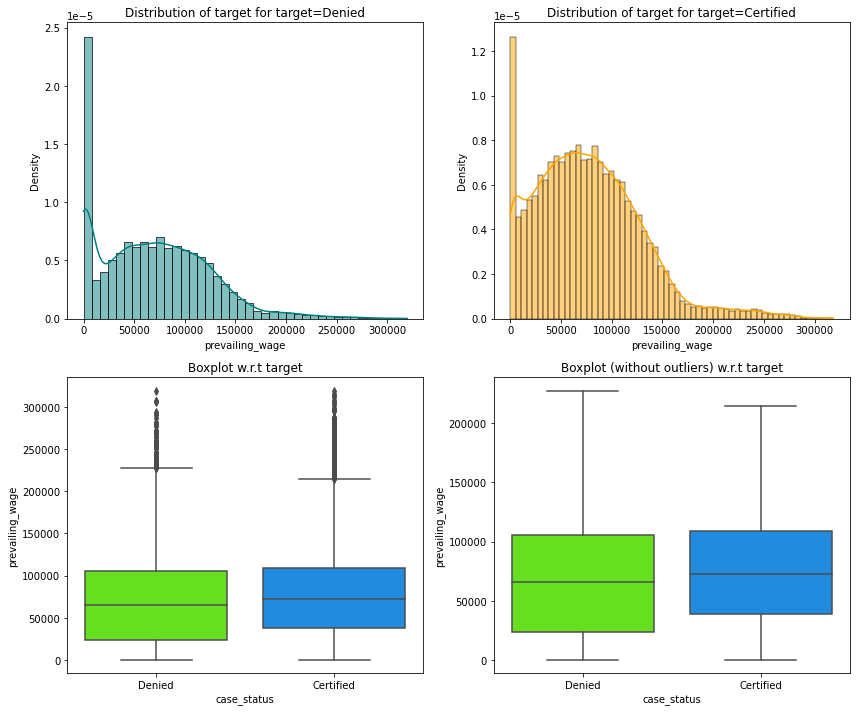

<IPython.core.display.Javascript object>

In [149]:
distribution_plot_wrt_target(df, "prevailing_wage", "case_status")

In [150]:
df.groupby(["case_status"])["prevailing_wage"].describe().T

case_status,Certified,Denied
count,17018.0000,8462.0000
mean,77293.6192,68748.6816
std,52042.7156,53890.1660
min,2.1367,2.9561
25%,38375.3300,23497.2950
50%,72486.2700,65431.4600
75%,108879.1075,105097.6400
max,318446.0500,319210.2700


<IPython.core.display.Javascript object>

* The average prevailing wage for certified visa application is 77293 dollars

**Observations:**
* Certified visa has higher average prevailing wage.

### The relationship between `prevailing_wage` and `region_of_employment`.

<AxesSubplot:xlabel='prevailing_wage', ylabel='region_of_employment'>

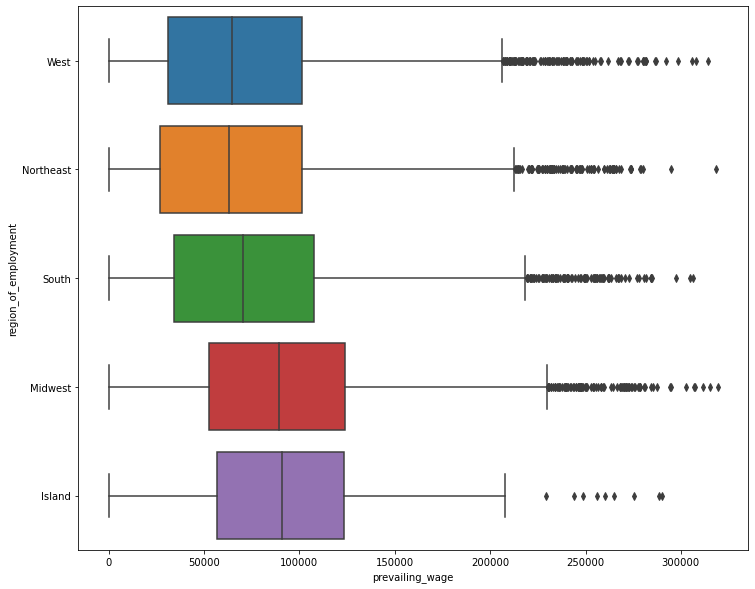

<IPython.core.display.Javascript object>

In [151]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=df, y="region_of_employment", x="prevailing_wage")

In [152]:
df.groupby(["region_of_employment"])["prevailing_wage"].describe().T

region_of_employment,Island,Midwest,Northeast,South,West
count,375.0000,4307.0000,7195.0000,7017.0000,6586.0000
mean,91712.7508,91696.7418,67872.6628,74040.5452,69832.6287
std,53836.0586,54561.0120,51561.4362,52468.4508,50638.4135
min,52.8246,20.1896,2.1367,2.9561,10.1111
25%,56892.2650,52699.7300,26859.1000,34056.7600,30861.8950
50%,90678.1700,89153.9100,63276.5100,70191.5200,64358.4400
75%,123159.5500,123758.8100,101165.4800,107829.2300,101184.7450
max,289878.6800,319210.2700,318446.0500,306206.6700,314156.0600


<IPython.core.display.Javascript object>

* The average prevailing wage in the Midwest and Island region are higher than in Northeast, South and West region.
* There are outliers.

### The relationship between `region_of_employment` and `case_status`.

In [153]:
df.groupby(["region_of_employment"])["case_status"].value_counts(1)

region_of_employment  case_status
Island                Certified     0.6027
                      Denied        0.3973
Midwest               Certified     0.7553
                      Denied        0.2447
Northeast             Certified     0.6290
                      Denied        0.3710
South                 Certified     0.7002
                      Denied        0.2998
West                  Certified     0.6225
                      Denied        0.3775
Name: case_status, dtype: float64

<IPython.core.display.Javascript object>

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


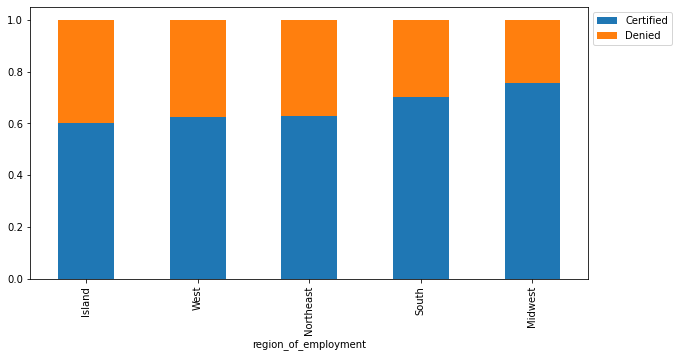

<IPython.core.display.Javascript object>

In [154]:
stacked_barplot(df, "region_of_employment", "case_status")

* Island region: Visa Certification (60%).
* West region: Visa Certification (63%).
* Northeast region: Visa Certification (63%).
* South region: Visa Certification (70%).
* Midwest region: Visa Certification (76%).

**Observation:**
* The Midwest region has the highest visa certification rate (76%).



full_time_position       N      Y    All
region_of_employment                    
All                   2707  22773  25480
South                  935   6082   7017
Northeast              804   6391   7195
West                   473   6113   6586
Midwest                450   3857   4307
Island                  45    330    375
------------------------------------------------------------------------------------------------------------------------


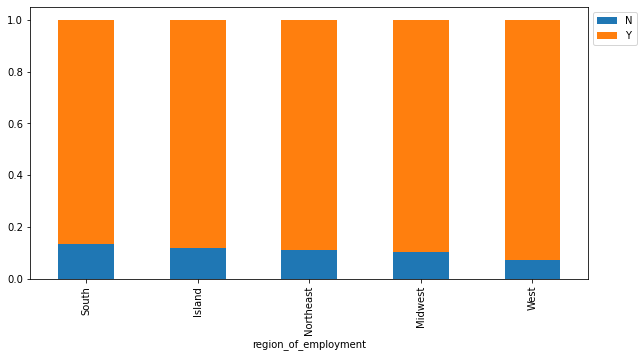

<IPython.core.display.Javascript object>

In [155]:
stacked_barplot(df, "region_of_employment", "full_time_position")

### The relationship between `region_of_employment` and `full_time_employment`.

In [156]:
df.groupby(["region_of_employment"])["full_time_position"].value_counts(1)

region_of_employment  full_time_position
Island                Y                    0.8800
                      N                    0.1200
Midwest               Y                    0.8955
                      N                    0.1045
Northeast             Y                    0.8883
                      N                    0.1117
South                 Y                    0.8668
                      N                    0.1332
West                  Y                    0.9282
                      N                    0.0718
Name: full_time_position, dtype: float64

<IPython.core.display.Javascript object>

* The majority of employers across all regions offer full time position.

### The relationship between `full_time_position` and ` case_status`.

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


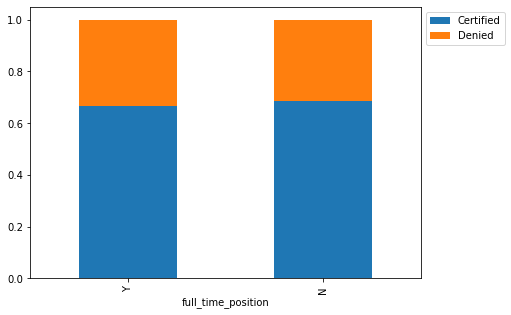

<IPython.core.display.Javascript object>

In [157]:
stacked_barplot(df, "full_time_position", "case_status")

* The type of the position (full-time or part-time) does not impact the visa certification rate.

### The relationship between `full_time_position` and `unit_of_wage`.

unit_of_wage        Hour  Month  Week   Year    All
full_time_position                                 
All                 2157     89   272  22962  25480
Y                   2138     84   262  20289  22773
N                     19      5    10   2673   2707
------------------------------------------------------------------------------------------------------------------------


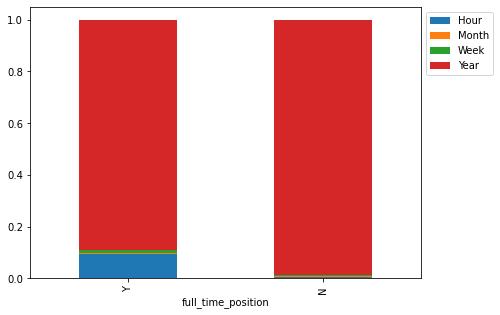

<IPython.core.display.Javascript object>

In [158]:
stacked_barplot(df, "full_time_position", "unit_of_wage")

* The majority of employers offer salary as yearly wage for either full-time or part-time position.

### Summary

**Univariate Analysis**
- ~50% or more of the companies established in the 2000s.
- The number of employees can infer the size of the company. Large companies tend to have more employees (minimum employees is 11, maximum employees is 602,069).
- The average prevailing wage is ~74,455 dollars.
- ~90% of company offer yearly pay unit.
- ~80% of the foreign employees earn a Bachelor's or higher.
- ~60% of the foreign employees has job experience.
- The majority of the foreign employees do not require job training.
- ~66% of foreign employees are from Asia, ~14.6% of foreign employees are from Europe, ~12.9% of foreign employees are from North America.
- Foreign employees prefer to employ in the Northeast (28%), the South (27%), the West (25%), the Midwest (17%) and the Island (1.5%) of the United States.
- The majority of the job offer is full-time position (~90%).
- According to the provide dataset, the rate of certification is ~67%.

**Bivariate Analyis**
- It appears that employees with higher education degree would be more likely to grant visa application assuming education level does impact the visa certification.
- Visa certification varies across continents.
- Foreign workers have a higher chance to achieve visa certification if they have prior job experience.
- If the employer offer a yearly wage,it is mostly like to be certified for work visa.
- Certified visa has higher average prevailing wage.
